<a href="https://colab.research.google.com/github/JiaxinYu/ani/blob/main/ANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANI study 2022.11.28

In [ ]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
rootpath = Path('drive/My Drive/All/projects/ANI')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#['INTUBATION', 'ABD INSUFFLATION', 'surg stimulation', 'extubation', 'incision']
for target_event in ['intubation', 'abd insufflation', 'surg stimulation', 'extubation', 'incision']:
  event_df = pd.DataFrame([])
  event_log = []
  for sub_idx in os.listdir(rootpath/'完成之Excel'):
    try:
      if sub_idx.endswith('xlsx'):
        try:
          temp_df = pd.read_excel(rootpath/'完成之Excel/{}'.format(sub_idx), header=1)
          temp_df['ANI'].replace(0, np.nan, inplace=True) # replace 0 with nan
          temp_df['ANI'].interpolate(method='linear', limit_direction='both', inplace=True) # impute nan with linear methods
          for event_index in range(len(temp_df[temp_df['Events'].str.lower() == target_event].index)):
            s1 = temp_df[temp_df['Events'].str.lower() == target_event].index[event_index]
            event_log.append([sub_idx, s1])
            event_df = pd.concat([event_df, temp_df['ANI'][s1:s1+299].reset_index(drop=True)], 1)
        except:
          temp_df = pd.read_excel(rootpath/'完成之Excel/{}'.format(sub_idx), header=0)
          temp_df['ANI'].replace(0, np.nan, inplace=True) # replace 0 with nan
          temp_df['ANI'].interpolate(method='linear', limit_direction='both', inplace=True) # impute nan with linear methods
          for event_index in range(len(temp_df[temp_df['Events'].str.lower() == target_event].index)):
            s1 = temp_df[temp_df['Events'].str.lower() == target_event].index[event_index]
            event_log.append([sub_idx, s1])
            event_df = pd.concat([event_df, temp_df['ANI'][s1:s1+299].reset_index(drop=True)], 1)
    except:
      print('errors in ', sub_idx)

  event_df = event_df.T
  event_df.reset_index(drop=True, inplace=True)
  event_df = pd.concat([pd.DataFrame(event_log), event_df], 1)
  event_df.to_csv(rootpath/'{}.csv'.format(target_event), index=False)

In [ ]:
temp_df['Events'].unique()

array([nan, 'awakening', 'INDUCTION', 'FENTANYL', 'LIDOCAINE',
       'PROPOFOL BOLUS', 'ROCURONIUM BOLUS', 'INTUBATION', 'OG INSERTION',
       'BIS PLACEMENT', 'no stimulation', 'INCISION', 'TROCAR ',
       'ABD INSUFFLATION', 'TABLE 15 UP', 'TABLE LEVEL', 'NICARDIPINE',
       'TRANDATE', 'TABLE 30 UP', 'ABD. DESUFFLATION', 'SUGAMMADEX ',
       'SUCTION', 'extubation', 'END OF PROCEDURE'], dtype=object)

# import cleaned dataset

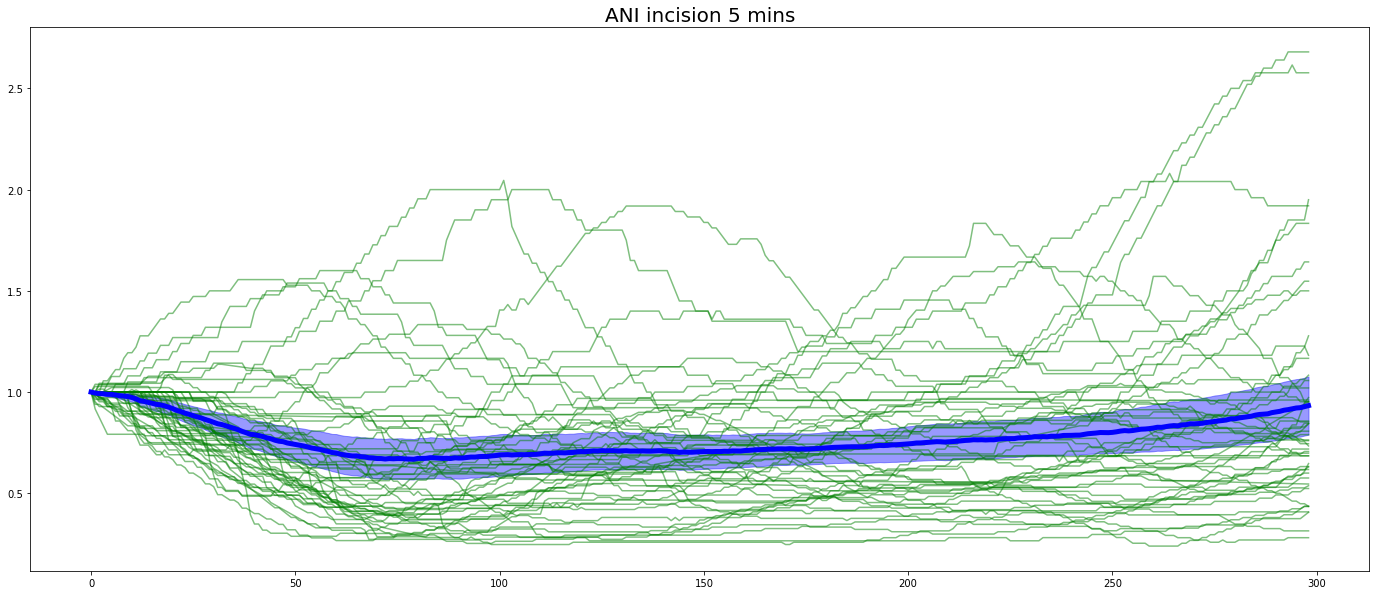

In [ ]:
incision = pd.read_csv(rootpath/'incision.csv')

plt.close()
plt.figure(figsize=(24, 10))
temp_array = []
for idx in range(len(incision)):
  #raw ani values
  # plt.plot(range(299), incision.iloc[idx, 2:], 'b')
  #percetage of ani values comparied with event onset
  if np.count_nonzero(incision.iloc[idx, 2:]) >= 290: # drop sample with missing values 
    temp_line = incision.iloc[idx, 2:]/incision.iloc[idx, 2]
    plt.plot(range(299), temp_line, 'g', alpha=0.5)
    temp_array.append(temp_line)

# plot the mean
ci = 1.96 * pd.DataFrame(temp_array).std()/np.sqrt(len(temp_array))
plt.plot(range(299), pd.DataFrame(temp_array).mean(), 'b', linewidth=5)
plt.fill_between(range(299), (pd.DataFrame(temp_array).mean()-ci), (pd.DataFrame(temp_array).mean()+ci), color='b', alpha=.4)

plt.title('ANI incision 5 mins', fontsize=20)
plt.show()

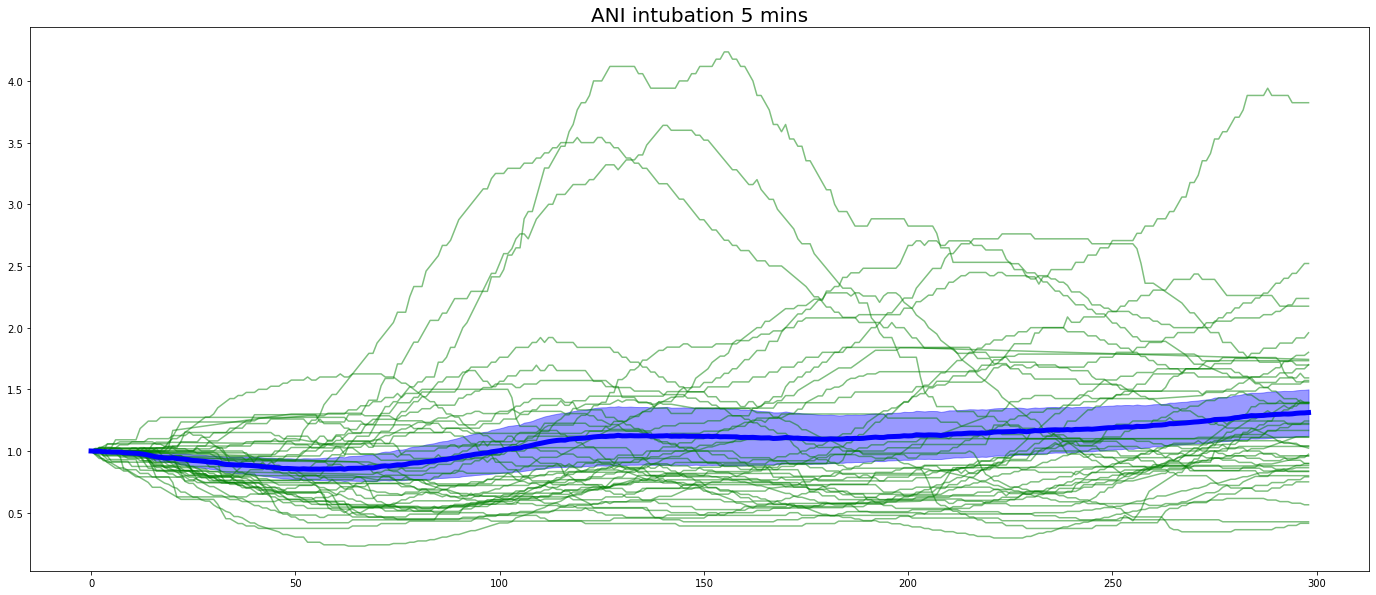

In [ ]:
intubation = pd.read_csv(rootpath/'intubation.csv')

plt.close()
plt.figure(figsize=(24, 10))
temp_array = []
for idx in range(len(intubation)):
  if np.count_nonzero(intubation.iloc[idx, 2:]) >= 290: 
    temp_line = intubation.iloc[idx, 2:]/intubation.iloc[idx, 2]
    plt.plot(range(299), temp_line, 'g', alpha=0.5)
    temp_array.append(temp_line)

ci = 1.96 * pd.DataFrame(temp_array).std()/np.sqrt(len(temp_array))
plt.plot(range(299), pd.DataFrame(temp_array).mean(), 'b', linewidth=5)
plt.fill_between(range(299), (pd.DataFrame(temp_array).mean()-ci), (pd.DataFrame(temp_array).mean()+ci), color='b', alpha=.4)

plt.title('ANI intubation 5 mins', fontsize=20)
plt.show()

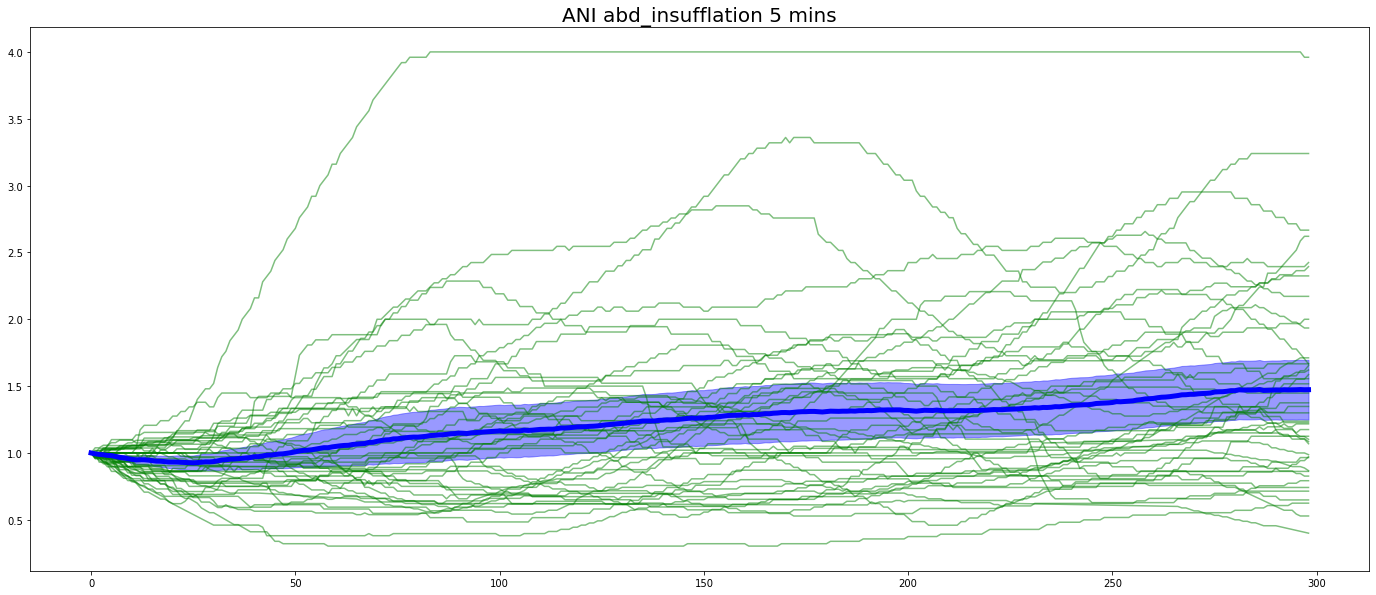

In [ ]:
abd_insufflation = pd.read_csv(rootpath/'abd insufflation.csv')

plt.close()
plt.figure(figsize=(24, 10))
temp_array = []
for idx in range(len(abd_insufflation)):
  if np.count_nonzero(abd_insufflation.iloc[idx, 2:]) >= 290: 
    temp_line = abd_insufflation.iloc[idx, 2:]/abd_insufflation.iloc[idx, 2]
    plt.plot(range(299), temp_line, 'g', alpha=0.5)
    temp_array.append(temp_line)

ci = 1.96 * pd.DataFrame(temp_array).std()/np.sqrt(len(temp_array))
plt.plot(range(299), pd.DataFrame(temp_array).mean(), 'b', linewidth=5)
plt.fill_between(range(299), (pd.DataFrame(temp_array).mean()-ci), (pd.DataFrame(temp_array).mean()+ci), color='b', alpha=.4)

plt.title('ANI abd_insufflation 5 mins', fontsize=20)
plt.show()

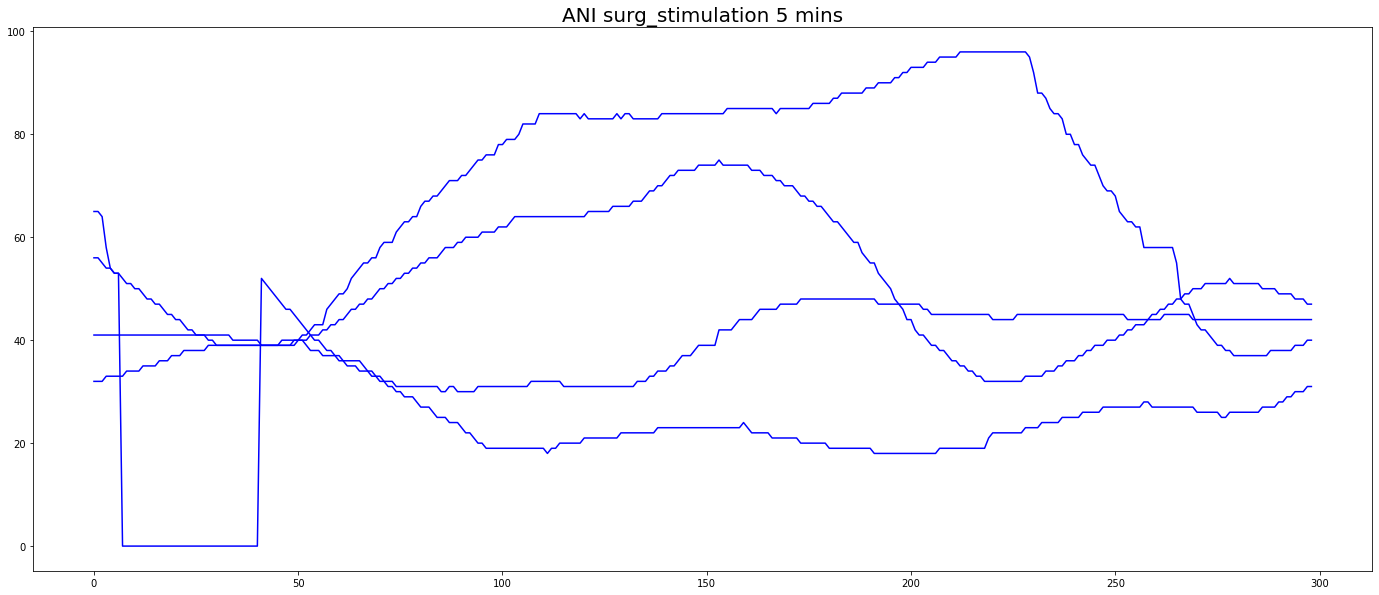

In [ ]:
surg_stimulation = pd.read_csv(rootpath/'surg stimulation.csv')
plt.close()
plt.figure(figsize=(24, 10))
for idx in range(len(surg_stimulation)):
  plt.plot(range(299), surg_stimulation.iloc[idx, 2:], 'b')

plt.title('ANI surg_stimulation 5 mins', fontsize=20)
plt.show()

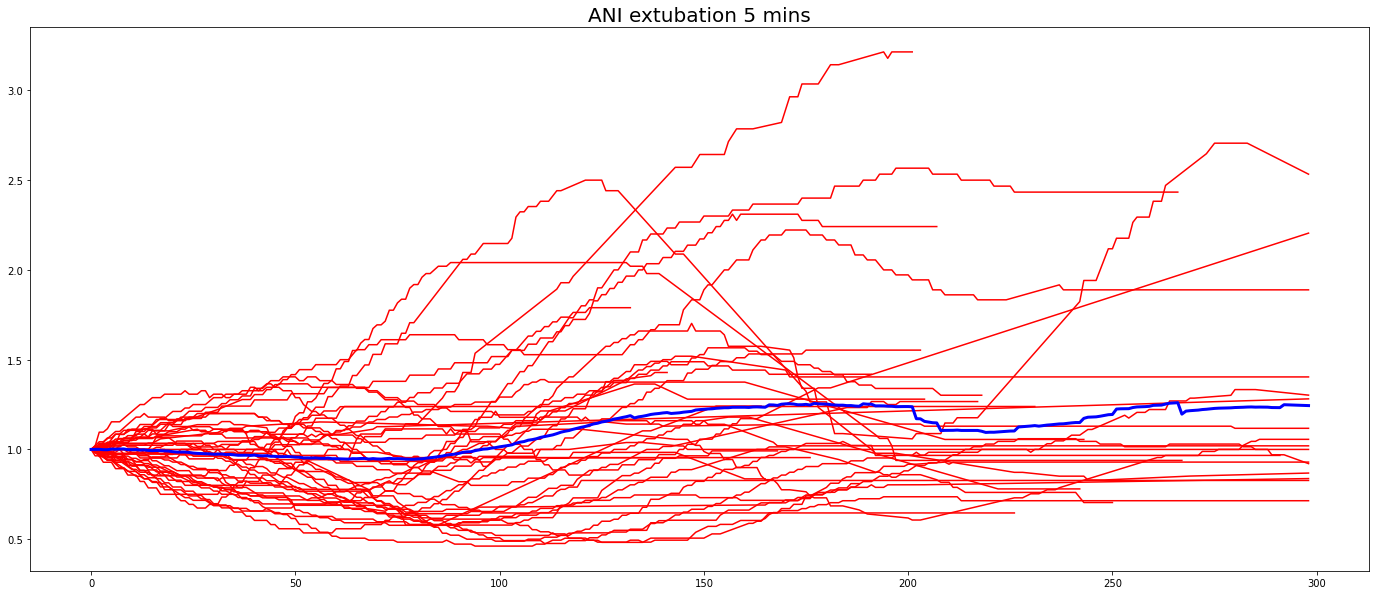

In [ ]:
extubation = pd.read_csv(rootpath/'extubation.csv')

plt.close()
plt.figure(figsize=(24, 10))
temp_array = []
for idx in range(len(extubation)):
  if np.count_nonzero(extubation.iloc[idx, 2:]) >= 200: 
    temp_line = extubation.iloc[idx, 2:]/extubation.iloc[idx, 2]
    plt.plot(range(299), temp_line, 'r')
    temp_array.append(temp_line)

plt.plot(range(299), pd.DataFrame(temp_array).mean(), 'b', linewidth=3)

plt.title('ANI extubation 5 mins', fontsize=20)
plt.show()

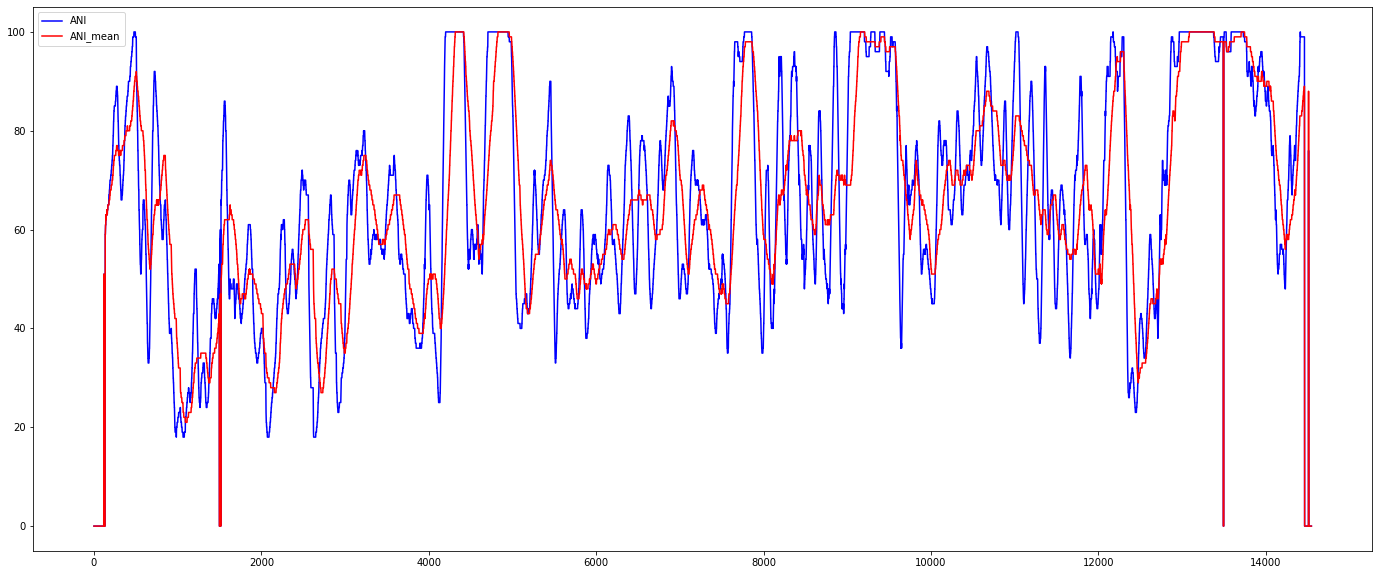

In [ ]:
plt.figure(figsize=(24, 10))
plt.plot(range(len(temp_df)), temp_df['ANI'], 'b', label='ANI')
plt.plot(range(len(temp_df)), temp_df['ANImean'], 'r-', label='ANI_mean')
plt.plot(range(len(temp_df)), temp_df['Quality'], 'go', label='ANI_mean')
plt.legend(['ANI', 'ANI_mean'])